In [2]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
data=pd.read_csv('Credit_Score.csv')

In [6]:
#summary of the data
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633330,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [63]:
#As some of the columns doesn't affect much I have dropped Name column as it is coinciding with ID column
data1=data.dropna()
data1red=data1.drop(columns=['Credit_Score','Name'])
data1red.shape

(100000, 26)

In [64]:
data1.shape

(100000, 28)

In [65]:
fq=data1red.groupby('Type_of_Loan').size()/len(data1red)
data1red.loc[:,'T_L_freq_encode']=data1red['Type_of_Loan'].map(fq)
data1red=data1red.drop(['Type_of_Loan'],axis=1)
data1red.shape

(100000, 26)

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

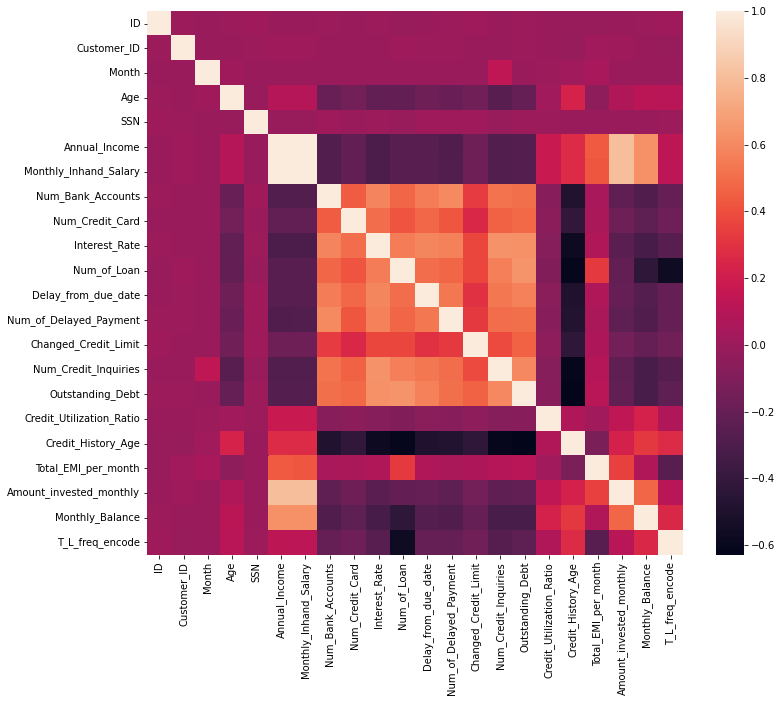

In [67]:
#correlation between features
plt.figure(figsize=(12,10))
sns.heatmap(data1red.corr())

In [68]:
#Dropping this column as it is highly correlated to Annual Income
data1red=data1red.drop(columns=['Monthly_Inhand_Salary'])

In [69]:
#encoding the remaining categorical data for independent variables
dataenc=pd.get_dummies(data=data1red,columns=['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour'])
dataenc

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,5634,3392,1,23,821000265,19114.12,3,4,3,4,...,0,0,1,0,0,0,1,0,0,0
1,5635,3392,2,23,821000265,19114.12,3,4,3,4,...,0,0,1,0,0,0,0,1,0,0
2,5636,3392,3,23,821000265,19114.12,3,4,3,4,...,0,0,1,0,0,0,0,0,1,0
3,5637,3392,4,23,821000265,19114.12,3,4,3,4,...,0,0,1,0,0,0,0,0,0,1
4,5638,3392,5,23,821000265,19114.12,3,4,3,4,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25,78735990,39628.99,4,6,7,2,...,0,0,1,0,1,0,0,0,0,0
99996,155626,37932,5,25,78735990,39628.99,4,6,7,2,...,0,0,1,0,0,1,0,0,0,0
99997,155627,37932,6,25,78735990,39628.99,4,6,7,2,...,0,0,1,0,1,0,0,0,0,0
99998,155628,37932,7,25,78735990,39628.99,4,6,7,2,...,0,0,1,0,0,0,0,1,0,0


In [70]:
x=dataenc.iloc[:,:].values
x.shape

(100000, 48)

In [71]:

y=data1.iloc[:,27].values
y

array(['Good', 'Good', 'Good', ..., 'Poor', 'Standard', 'Poor'],
      dtype=object)

In [72]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer

In [73]:
#encoding the categorical data in dependent variable
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 2, 1])

In [74]:
#Dividing data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [75]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [76]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(max_iter=1000,random_state = 0)
classifier1.fit(x_train, y_train)
y_pred = classifier1.predict(x_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
trainaccuracy=classifier1.score(x_train, y_train)

testaccuracy = classifier1.score(x_test, y_test)
print("Test accuracy from logistic regression\t", testaccuracy)
print("Train accuracy from logistic regression\t", trainaccuracy)

[[2329   87 1173]
 [ 508 3168 2150]
 [1444 1460 7681]]
Test accuracy from logistic regression	 0.6589
Train accuracy from logistic regression	 0.6631625


In [77]:
l=[500,300,100,200,50,5]
#KNN with different K values

In [78]:
from sklearn.neighbors import KNeighborsClassifier

classifier2 = KNeighborsClassifier(n_neighbors = 500, metric = 'minkowski', p = 2)
  #Euclidean matrix is used.
classifier2.fit(x_train, y_train)
  # Predicting the Test set results
y_pred1 = classifier2.predict(x_test)
print(y_pred1)
knntestaccuracy1 = classifier2.score(x_test, y_test)
#knntrainaccuracy1 = classifier2.score(x_train, y_train)
cm1 = confusion_matrix(y_test, y_pred1)
 
print("Test Model accuracy", knntestaccuracy1)
#print("Train Model accuracy", knntrainaccuracy1)
print("Confusion matrix\n", cm1)

[1 1 2 ... 0 2 0]
Test Model accuracy 0.64085
Confusion matrix
 [[1971   50 1568]
 [ 488 3134 2204]
 [1247 1626 7712]]


In [79]:
from sklearn.neighbors import KNeighborsClassifier

classifier5 = KNeighborsClassifier(n_neighbors = 300, metric = 'minkowski', p = 2)
  #Euclidean matrix is used.
classifier5.fit(x_train, y_train)
  # Predicting the Test set results
y_pred2 = classifier5.predict(x_test)
print(y_pred2)
knntestaccuracy2 = classifier5.score(x_test, y_test)
cm2 = confusion_matrix(y_test, y_pred2)
 
print("TEST Model accuracy", knntestaccuracy2)

print("Confusion matrix\n", cm2)

[1 1 0 ... 2 2 0]
TEST Model accuracy 0.65075
Confusion matrix
 [[2229   40 1320]
 [ 571 3141 2114]
 [1420 1520 7645]]


In [80]:
from sklearn.neighbors import KNeighborsClassifier

classifier3 = KNeighborsClassifier(n_neighbors = 200, metric = 'minkowski', p = 2)
  #Euclidean matrix is used.
classifier3.fit(x_train, y_train)
  # Predicting the Test set results
y_pred3 = classifier3.predict(x_test)
print(y_pred3)
knntestaccuracy3 = classifier3.score(x_test, y_test)
#knntrainaccuracy3 = classifier3.score(x_train, y_train)
cm3 = confusion_matrix(y_test, y_pred3)
 
print("Test Model accuracy", knntestaccuracy3)
#print("Train Model accuracy", knntrainaccuracy3)

print("Confusion matrix\n", cm3)

[1 1 0 ... 0 2 0]
Test Model accuracy 0.65815
Confusion matrix
 [[2330   31 1228]
 [ 620 3129 2077]
 [1476 1405 7704]]


In [81]:
from sklearn.neighbors import KNeighborsClassifier

classifier4 = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)
  #Euclidean matrix is used.
classifier4.fit(x_train, y_train)
  # Predicting the Test set results
y_pred4 = classifier4.predict(x_test)
print(y_pred4)
knntestaccuracy4 = classifier4.score(x_test, y_test)
cm4 = confusion_matrix(y_test, y_pred4)
 
print("Test Model accuracy", knntestaccuracy4)

print("Confusion matrix\n", cm4)

[1 1 0 ... 0 2 0]
Test Model accuracy 0.6721
Confusion matrix
 [[2461   27 1101]
 [ 654 3175 1997]
 [1489 1290 7806]]


In [82]:
classifier6 = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 2)
  #Euclidean matrix is used.
classifier6.fit(x_train, y_train)
  # Predicting the Test set results
y_pred6 = classifier6.predict(x_test)
print(y_pred6)
knntestaccuracy6 = classifier6.score(x_test, y_test)
cm6 = confusion_matrix(y_test, y_pred6)
 
print("Test Model accuracy", knntestaccuracy6)

print("Confusion matrix\n", cm6)

[1 1 0 ... 0 2 0]
Test Model accuracy 0.6804
Confusion matrix
 [[2458   35 1096]
 [ 642 3259 1925]
 [1458 1236 7891]]


In [83]:
classifier7= KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
  #Euclidean matrix is used.
classifier7.fit(x_train, y_train)
  # Predicting the Test set results
y_pred7 = classifier7.predict(x_test)
print(y_pred7)
knntestaccuracy7 = classifier7.score(x_test, y_test)
cm7 = confusion_matrix(y_test, y_pred7)
 
print("Test Model accuracy", knntestaccuracy7)

print("Confusion matrix\n", cm7)

[1 2 2 ... 0 2 0]
Test Model accuracy 0.6938
Confusion matrix
 [[2291  146 1152]
 [ 515 3704 1607]
 [1290 1414 7881]]


In [84]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred5=clf.predict(x_test)
y_pred5
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.83185


[0.04670186 0.03137276 0.03230698 0.02893462 0.0320199  0.0332455
 0.02236868 0.03514557 0.06690174 0.01825225 0.04863753 0.03169419
 0.04726871 0.03676613 0.08937701 0.03594407 0.05151149 0.03342005
 0.03162401 0.03813038 0.01697143 0.00271238 0.00272312 0.00295614
 0.0028226  0.0028314  0.00282417 0.0025827  0.00299162 0.00259621
 0.00280929 0.00263096 0.00264717 0.00294073 0.002768   0.00258271
 0.01413964 0.0353075  0.04874255 0.00346181 0.00870599 0.01127977
 0.00455038 0.00535739 0.00410062 0.00388239 0.00446646 0.00599143]


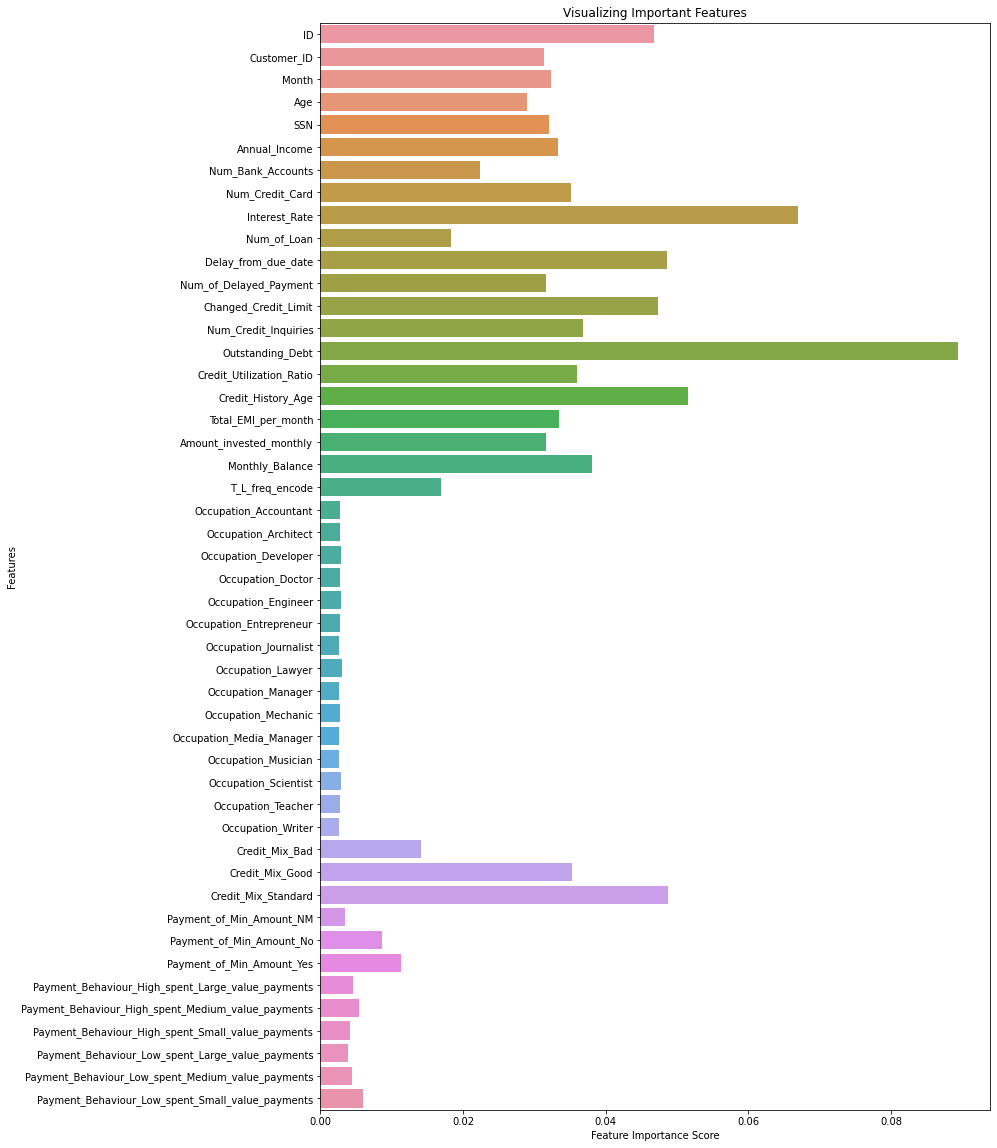

In [85]:
#identifying the most important features in the data
importance = clf.feature_importances_
print(importance)
t=dataenc.columns[:]
plt.figure(figsize=(12,20))
sns.barplot(x=importance, y=t )
# Add labels to your graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Feature:  0 , Score:  0.04670186100752453
Feature:  1 , Score:  0.03137276002577544
Feature:  2 , Score:  0.032306981277665986
Feature:  3 , Score:  0.02893461576585724
Feature:  4 , Score:  0.03201990498021667
Feature:  5 , Score:  0.033245503893975806
Feature:  6 , Score:  0.022368676282106037
Feature:  7 , Score:  0.03514557142233304
Feature:  8 , Score:  0.0669017448340632
Feature:  9 , Score:  0.018252254557966415
Feature:  10 , Score:  0.048637529269040886
Feature:  11 , Score:  0.03169419119898797
Feature:  12 , Score:  0.04726870809429922
Feature:  13 , Score:  0.03676612519219091
Feature:  14 , Score:  0.08937700662408953
Feature:  15 , Score:  0.03594407268570479
Feature:  16 , Score:  0.051511486030323975
Feature:  17 , Score:  0.033420053350528195
Feature:  18 , Score:  0.03162400644113967
Feature:  19 , Score:  0.03813038177079251
Feature:  20 , Score:  0.016971429104407312
Feature:  21 , Score:  0.0027123822762542714
Feature:  22 , Score:  0.0027231

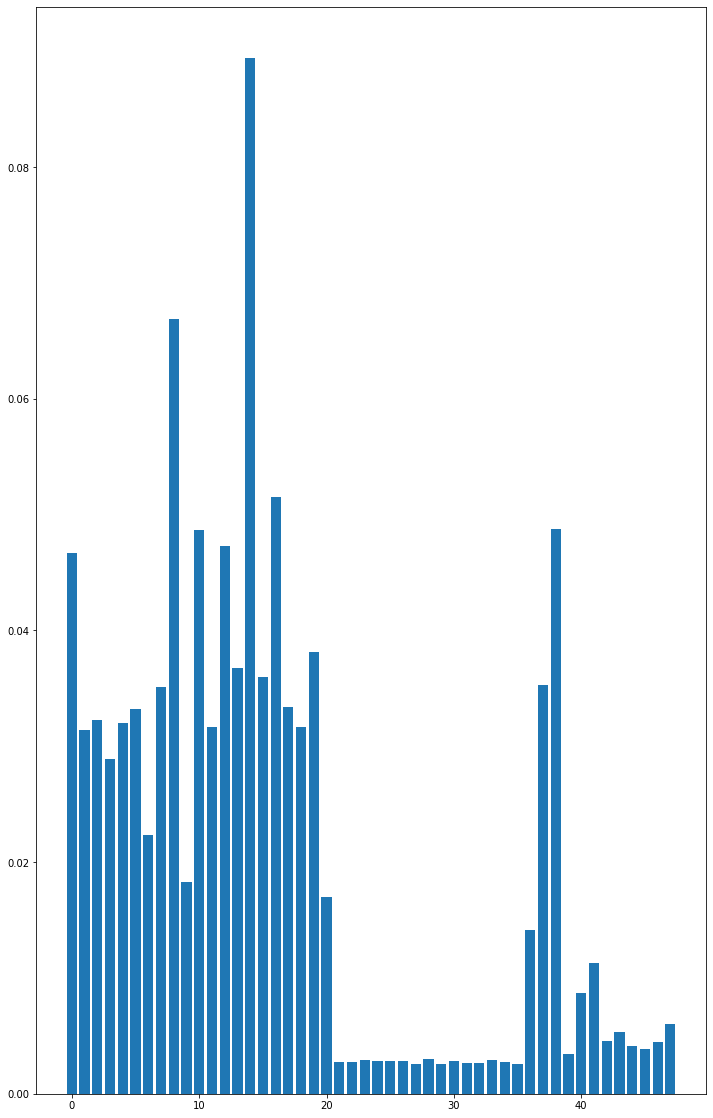

In [86]:
for i,v in enumerate(importance):
  print('Feature: ',i, '\b, Score: ',v)
plt.figure(figsize=(12,20))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()